In [ ]:
"""
Nama : Faisal Mashuri
Domisili : Bekasi, Jawa Barat
"""

In [2]:
import os
from zipfile import ZipFile

In [3]:
!wget --no-check-certificate \https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O rockpaperscissors.zip

--2021-04-20 12:11:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.91MB/s    in 51s     

2021-04-20 12:12:14 (6.02 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
!ls

rockpaperscissors.zip  sample_data


In [5]:
base_zip = 'rockpaperscissors.zip'
file_zip = ZipFile(base_zip, 'r')
file_zip.extractall()
file_zip.close()

In [6]:
!ls

__MACOSX  rockpaperscissors  rockpaperscissors.zip  sample_data


In [7]:
base_dir = 'rockpaperscissors/rps-cv-images'

In [8]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='wrap',
                                   validation_split=0.4)

In [11]:
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    target_size=(100,150),
                                                    shuffle=True,
                                                    batch_size=32,
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory( base_dir,
        target_size=(100, 150),
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [12]:
import keras

class MyCallbacks(keras.callbacks.Callback):
  def __init__(self, monitor='accuracy', accuracy=0.98):
    super(MyCallbacks, self).__init__()
    self.monitor = monitor
    self.accuracy = accuracy

  def on_epoch_end(self,epoch, logs={}):
    logs = logs or {}
    acc = logs.get(self.monitor)
    if acc is not None:
      if acc >= self.accuracy:
        print('Epoch %d: Reached baseline, terminating training' % (epoch))
        self.model.stop_training = True

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,Flatten
from keras.optimizers import Adam 

callbacks = MyCallbacks()

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu',input_shape=(100,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(152, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 17, 64)       

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [28]:
history = model.fit(train_generator, steps_per_epoch=32, epochs=20,
                    validation_data=validation_generator,
                    validation_steps=8,
                    callbacks=[callbacks],
                    verbose=2)

Epoch 1/20
32/32 - 18s - loss: 1.0818 - accuracy: 0.4225 - val_loss: 0.9762 - val_accuracy: 0.4961
Epoch 2/20
32/32 - 17s - loss: 0.7213 - accuracy: 0.6911 - val_loss: 0.5083 - val_accuracy: 0.8516
Epoch 3/20
32/32 - 17s - loss: 0.4453 - accuracy: 0.8290 - val_loss: 0.3666 - val_accuracy: 0.8789
Epoch 4/20
32/32 - 17s - loss: 0.2710 - accuracy: 0.9074 - val_loss: 0.3466 - val_accuracy: 0.8945
Epoch 5/20
32/32 - 17s - loss: 0.3208 - accuracy: 0.8813 - val_loss: 0.2939 - val_accuracy: 0.8984
Epoch 6/20
32/32 - 18s - loss: 0.2021 - accuracy: 0.9336 - val_loss: 0.2275 - val_accuracy: 0.9180
Epoch 7/20
32/32 - 18s - loss: 0.1990 - accuracy: 0.9287 - val_loss: 0.1990 - val_accuracy: 0.9375
Epoch 8/20
32/32 - 17s - loss: 0.1545 - accuracy: 0.9497 - val_loss: 0.2159 - val_accuracy: 0.9453
Epoch 9/20
32/32 - 18s - loss: 0.1473 - accuracy: 0.9482 - val_loss: 0.0935 - val_accuracy: 0.9688
Epoch 10/20
32/32 - 17s - loss: 0.1260 - accuracy: 0.9537 - val_loss: 0.1391 - val_accuracy: 0.9570
Epoch 11/

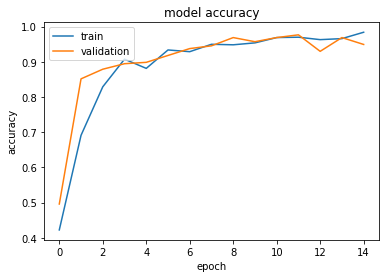

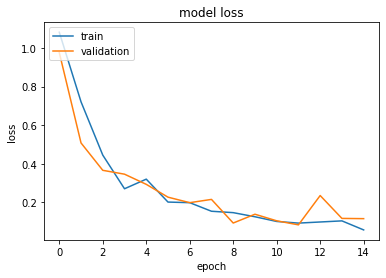

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (2).png
batu banget


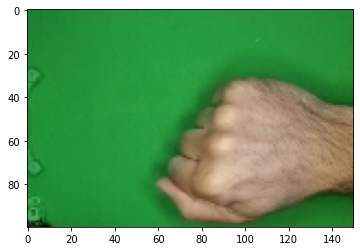

In [ ]:
from google.colab import files
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for files in uploaded.keys():
    path = files
    img = image.load_img(path, target_size=(100, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
  
    # print(fn)
    if classes[0][0] == 1:
        print('katanya sih kertas')
    elif classes[0][1] == 1:
        print('batu banget')
    else:
        print('gunting nihh boss')